Importing all the necessary libraries including the module 'confitmodule' written for the simulation (discussed later):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import confitmodule as cm
from scipy.signal import savgol_filter

%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 8]
plt.rcParams.update({   'font.size': 28,
                        "font.family": "serif",
                        "font.serif": ["CMU serif"],
                        "font.sans-serif" : ["CMU sans serif"],
                        })
plt.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)
plt.rc('pgf', texsystem='pdflatex')
plt.rcParams['mathtext.fontset'] = 'stix'


Defining a function 'diff' for numerical differentiation of the IV data:

In [3]:
def diff(x,y):
    return [(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(x.size -1)]

Reading, differentiationg and normalising the IV data:

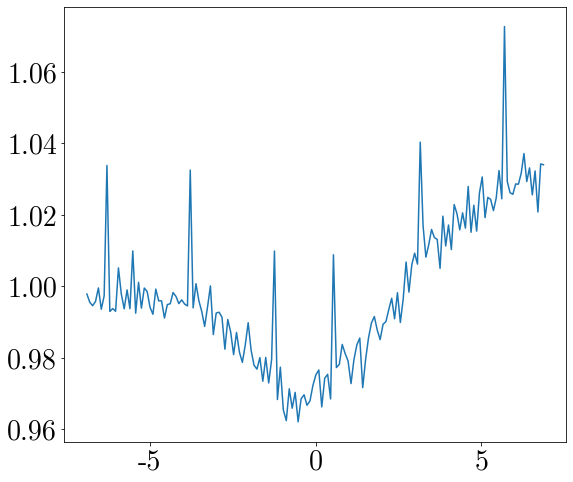

In [5]:
path = "/mnt/localdiskd/Semester 8/Project - Superconductivity/Code/CBS/data/goodtunneljunc-NbNAloAg_2903+0704/iv16.5k.txt"
data = np.transpose(np.loadtxt(path, usecols=(0,1),skiprows=1))

didv = diff(data[0],data[1])

dat = np.array([data[0,1:],didv])
dat = dat[:,100:-100]
dat[1] = dat[1]/np.average(dat[1,5:15])

plt.plot(dat[0],dat[1])

Using a polynomial approximator based on window length to reduce noise in the data. Further, we remove linear bias in the conductance data. Green dots represents original data, red curve the smoothened data, and blur curve is the data with linear bias removed:

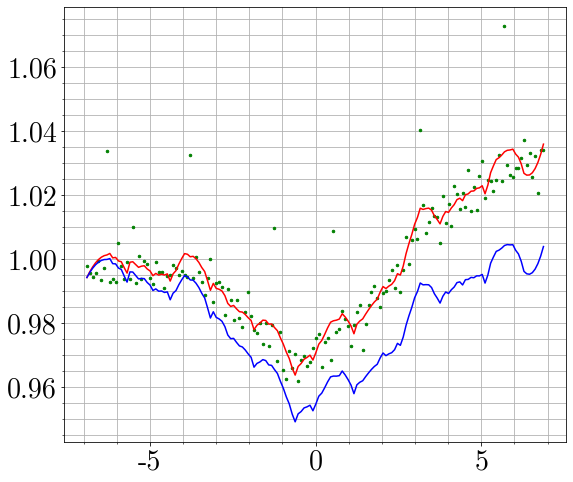

In [6]:

yhat = savgol_filter(dat[1], 15, 2) # window size, polynomial order

plt.plot(dat[0],dat[1],'.g',markersize=5)
plt.plot(dat[0],yhat,'r')
plt.minorticks_on()
plt.grid(which='both')

dat[1] = yhat

slope_shift = (np.average(dat[1][-20:])-np.average(dat[1][:20]))/(dat[0][-1]-dat[0][0])
plt.plot(dat[0],yhat - (dat[0]-dat[0][0])*slope_shift,'b')
dat[1] = yhat - (dat[0]-dat[0][0])*slope_shift


We proceed to fit the peaks using a fititng function in the 'confitmodule' we haev written and discussed later. We develop a mask that assigns higher weight to the points around peaks for better fitting of the band gap and broadening parameters. Then we call the fitting function and print the fit parameters and the associated errors.

[2.17879232 1.05654123]
[0.36141752 0.04441692]


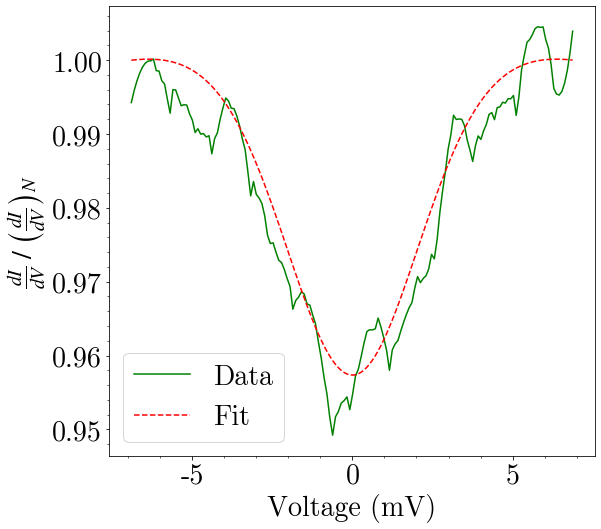

In [7]:

T=16.5

lcut1 = -6.0
lcut2 = -2
rcut1 = 2
rcut2 = 6.0
wt=100

mask = (lcut2 > dat[0])*(dat[0] > lcut1)+(rcut1<dat[0])*(dat[0]<rcut2)
unc = mask*1/wt + ~mask*(np.max(dat[1])-np.max(dat[0]))/10

fit,err = cm.Conductancefit(dat,T,unc,inter='False')
print(fit)
print(2.355*np.sqrt(np.diag(err)))

V = np.linspace(dat[0][0],dat[0][-1],500)
# V=np.linspace(-7,7,300)
G_values = [cm.G_cond(i,1.5,0.9,T) for i in V]
G_values = np.array(G_values)/G_values[0]
# np.savetxt("abc.txt", G_values)
# plt.plot(dat[0],dat[1]*mask, '.b')
plt.plot(dat[0],dat[1],'-g',label='Data')
plt.plot(V,G_values,'--r',label='Fit')

plt.xlabel('Voltage (mV)')
plt.ylabel(r'${\frac{dI}{dV}} \; / \; {\left(\frac{dI}{dV}\right)_N}$')
plt.legend()
plt.minorticks_on()
plt.tight_layout()
# plt.show()
plt.savefig('/mnt/localdiskd/Semester 8/Project - Superconductivity/Report/images/tunintrofit.pdf')


/mnt/localdiskd/Semester 8/Project - Superconductivity/Code/CBS/confitmodule.py:24: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return scint.quad(tmp,-100,100)[0]
/mnt/localdiskd/Semester 8/Project - Superconductivity/Code/CBS/confitmodule.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scint.quad(tmp,-100,100)[0]
/mnt/localdiskd/Semester 8/Project -

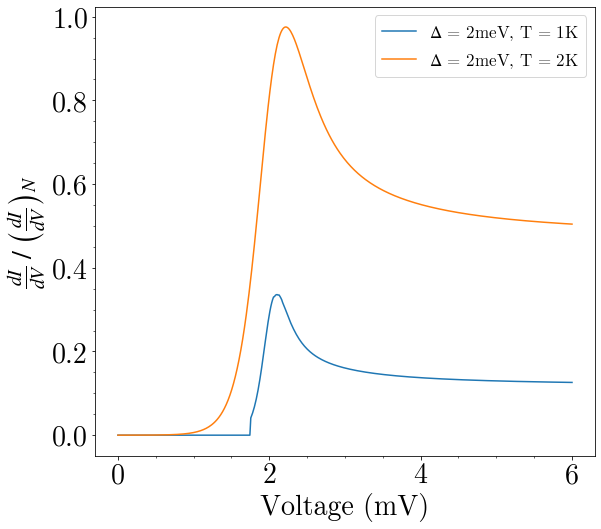

In [23]:
T = 1
V = np.linspace(0,6,500)
G_values = [cm.G_cond(i,0,2,T) for i in V]

plt.plot(V,G_values,label=r'$\Delta$ = 2meV, T = 1K')
T = 2
V = np.linspace(0,6,500)
G_values = [cm.G_cond(i,0,2,T) for i in V]

plt.plot(V,G_values,label=r'$\Delta$ = 2meV, T = 2K')

plt.xlabel('Voltage (mV)')
plt.ylabel(r'${\frac{dI}{dV}} \; / \; {\left(\frac{dI}{dV}\right)_N}$')
plt.legend(loc=1,prop={'size': 17})
plt.minorticks_on()
plt.tight_layout()
# plt.show()
# plt.savefig('/mnt/localdiskd/Semester 8/Project - Superconductivity/Report/images/tunnelintro.pdf')

In [ ]:
V = np.linspace(dat[0][0],dat[0][-1],500)
G_values = [cm.G_cond(i,0.18617034,3.06114686,T) for i in V]
G_values = np.array(G_values)/G_values[0]
# np.savetxt("abc.txt", G_values)
# plt.plot(dat[0],dat[1]*mask, '.b')
plt.plot(dat[0],dat[1],'-g',label='Data')
plt.plot(V,G_values,'--r',label='Fit')

plt.xlabel('Voltage (mV)')
plt.ylabel(r'${\frac{dI}{dV}} \; / \; {\left(\frac{dI}{dV}\right)_N}$')
plt.legend()
plt.minorticks_on()
plt.tight_layout()
plt.show()